In [ ]:
import requests
import pandas as pd

def fetch_all_sampling_points():
    base_url = "https://api.euskadi.eus/water-quality/sampling-points"
    current_page = 1
    items_per_page = 100 
    all_items = []
    
    while True:
        params = {
            "currentPage": current_page,
            "itemsOfPage": items_per_page,
            "format": "json",
            "lang": "SPANISH"
        }
        response = requests.get(base_url, params=params)
        
        if response.status_code != 200:
            print(f"Error en la solicitud: {response.status_code}")
            break
        
        data = response.json()
        all_items.extend(data.get("items", []))
        
        if current_page >= data.get("totalPages", 0):
            break
        
        current_page += 1
    
    return all_items

def create_dataframe(items):
    df = pd.DataFrame([
        {
            "id": item["id"],
            "name": item["name"],
            "locality": item["location"]["locality"],
            "municipality": item["location"]["municipality"],
            "county": item["location"]["county"],
            "municipalityId": item["location"]["municipalityId"],
            "countyId": item["location"]["countyId"],
            "zoneId": item["location"]["zoneId"],
            "ekuisCodeZone": item["location"]["ekuisCodeZone"],
            "zone": item["location"]["zone"]
        }
        for item in items
    ])
    return df

if __name__ == "__main__":
    items = fetch_all_sampling_points()
    df = create_dataframe(items)
    print(df.head())  # Mostrar primeras filas
    # df.to_csv("sampling_points.csv", index=False)  # Guardar en CSV



           id                              name    locality municipality  \
0  1030030000              FUENTE DE VILLAVERDE  Villaverde       LAGRAN   
1  1489030000               FUENTE PLAZA LAGRAN      Lagran       LAGRAN   
2  1513010000        ETAP DE LUIAONDO (IRTEERA)    Luiaondo        AYALA   
3  1517030000             FUENTE PUBLICA PIPAON      Pipaon       LAGRAN   
4  1522010000  FUENTE PUBLICA IGLESIA SALMANTÓN  SalmantÃ³n        AYALA   

  county municipalityId countyId  zoneId ekuisCodeZone        zone  
0  ARABA            030       01     300         01030  VILLAVERDE  
1  ARABA            030       01     412         01489      LAGRAN  
2  ARABA            010       01     471         01513    LUIAONDO  
3  ARABA            030       01     475         01517      PIPAON  
4  ARABA            010       01     480         01522   SALMANTÓN  


In [18]:
df

,id,name,locality,municipality,county,municipalityId,countyId,zoneId,ekuisCodeZone,zone
0,1030030000,FUENTE DE VILLAVERDE,Villaverde,LAGRAN,ARABA,030,01,300,01030,VILLAVERDE
1,1489030000,FUENTE PLAZA LAGRAN,Lagran,LAGRAN,ARABA,030,01,412,01489,LAGRAN
2,1513010000,ETAP DE LUIAONDO (IRTEERA),Luiaondo,AYALA,ARABA,010,01,471,01513,LUIAONDO
3,1517030000,FUENTE PUBLICA PIPAON,Pipaon,LAGRAN,ARABA,030,01,475,01517,PIPAON
4,1522010000,FUENTE PUBLICA IGLESIA SALMANTÓN,SalmantÃ³n,AYALA,ARABA,010,01,480,01522,SALMANTÓN


In [ ]:
import requests
import pandas as pd

def fetch_first_five_sampling_points():
    base_url = "https://api.euskadi.eus/water-quality/sampling-points"
    params = {
        "currentPage": 1,
        "itemsOfPage": 100,  # Solicita más para asegurarte de tener datos suficientes
        "format": "json",
        "lang": "SPANISH"
    }

    try:
        response = requests.get(base_url, params=params, timeout=30)  
        response.raise_for_status()  
        data = response.json()
        
        # Obtener solo los primeros 5 puntos de la respuesta
        sampling_points = data.get("items", [])[:5]  
        return sampling_points  
    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud: {e}")
        return []

def create_dataframe(items):
    df = pd.DataFrame([
        {
            "id": item["id"],
            "name": item["name"],
            "locality": item["location"]["locality"],
            "municipality": item["location"]["municipality"],
            "county": item["location"]["county"],
            "municipalityId": item["location"]["municipalityId"],
            "countyId": item["location"]["countyId"],
            "zoneId": item["location"]["zoneId"],
            "ekuisCodeZone": item["location"]["ekuisCodeZone"],
            "zone": item["location"]["zone"]
        }
        for item in items
    ])
    return df

if __name__ == "__main__":
    items = fetch_first_five_sampling_points()
    df = create_dataframe(items)
    print(df.head())  # Mostrar primeras filas

In [13]:
import requests

def get_last_10_measurement_dates(sampling_point_id):
    url = f"https://api.euskadi.eus/water-quality/sampling-points/{sampling_point_id}/measurements"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        print(data)
        # Ordenar por fecha en orden descendente
        sorted_data = sorted(data, key=lambda x: x["measurementDate"], reverse=True)
        
        # Obtener las últimas 10 fechas
        last_10_dates = [entry["measurementDate"] for entry in sorted_data[:10]]
        
        return last_10_dates
    else:
        print(f"Error en la solicitud: {response.status_code}")
        return None

sampling_point_id = "48003090003"  
last_10_dates = get_last_10_measurement_dates(sampling_point_id)

print(last_10_dates)

[{'measurementDate': '2025-01-03', 'qualificationCode': 1, 'qualification': 'Apta para el consumo', '_links': {'self': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2025-01-03'}, 'analyticalData': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2025-01-03/analytical-data'}}}, {'measurementDate': '2024-12-27', 'qualificationCode': 1, 'qualification': 'Apta para el consumo', '_links': {'self': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2024-12-27'}, 'analyticalData': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2024-12-27/analytical-data'}}}, {'measurementDate': '2024-12-17', 'qualificationCode': 1, 'qualification': 'Apta para el consumo', '_links': {'self': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/wa

In [3]:
BASE_URL = "https://api.euskadi.eus/water-quality/sampling-points"
def get_analytical_data(sampling_point_id, measurement_date):
    url = f"{BASE_URL}/{sampling_point_id}/measurements/{measurement_date}/analytical-data"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()  # Devuelve los datos analíticos
    else:
        print(f"Error al obtener datos analíticos para {measurement_date}: {response.status_code}")
        return None


sampling_point_id = "48003090003"  
last_10_dates = get_last_10_measurement_dates(sampling_point_id)

if last_10_dates:
    analytical_data_results = {}
    
    for date in last_10_dates:
        print(date)
        analytical_data = get_analytical_data(sampling_point_id, date)
        analytical_data_results[date] = analytical_data  
    
    print(analytical_data_results)

[{'measurementDate': '2025-01-03', 'qualificationCode': 1, 'qualification': 'Apta para el consumo', '_links': {'self': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2025-01-03'}, 'analyticalData': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2025-01-03/analytical-data'}}}, {'measurementDate': '2024-12-27', 'qualificationCode': 1, 'qualification': 'Apta para el consumo', '_links': {'self': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2024-12-27'}, 'analyticalData': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/water-quality/sampling-points/48003090003/measurements/2024-12-27/analytical-data'}}}, {'measurementDate': '2024-12-17', 'qualificationCode': 1, 'qualification': 'Apta para el consumo', '_links': {'self': {'name': 'SE SALINILLAS', 'href': 'https://api.euskadi.eus/wa

In [4]:
analytical_data_results

{'2025-01-03': [{'date': '2025-01-03',
   'parameter': 'ALUMINIO',
   'value': 0.0,
   'unitOfMeasure': 'µg/l'},
  {'date': '2025-01-03',
   'parameter': 'AMONIO',
   'value': 0.0,
   'unitOfMeasure': 'mg/l'},
  {'date': '2025-01-03',
   'parameter': 'CLORO LIBRE RESIDUAL',
   'value': 0.51,
   'unitOfMeasure': 'mg/l'},
  {'date': '2025-01-03',
   'parameter': 'CLOSTRIDIUM PERFRINGENS (INCLUIDAS LAS ESPORAS)',
   'value': 0.0,
   'unitOfMeasure': 'ufc/100 ml'},
  {'date': '2025-01-03',
   'parameter': 'COLIFORMES TOTALES (NMP)',
   'value': 0.0,
   'unitOfMeasure': 'nmp/100 ml'},
  {'date': '2025-01-03',
   'parameter': 'COLOR (Pt/Co)',
   'value': 0.0,
   'unitOfMeasure': 'mg/l'},
  {'date': '2025-01-03',
   'parameter': 'CONDUCTIVIDAD (20ºC)',
   'value': 177.0,
   'unitOfMeasure': 'µs/cm'},
  {'date': '2025-01-03',
   'parameter': 'ENTEROCOCOS INTESTINALES (NMP)',
   'value': 0.0,
   'unitOfMeasure': 'nmp/100ml'},
  {'date': '2025-01-03',
   'parameter': 'ESCHERICHIA COLI (NMP)',
  

In [6]:
import pandas as pd



# Convertir el diccionario en una lista de diccionarios
records = []
for date, measurements in analytical_data_results.items():
    records.extend(measurements)

# Crear DataFrame
df = pd.DataFrame(records)
df

,date,parameter,value,unitOfMeasure
0,2025-01-03,ALUMINIO,0.00,µg/l
1,2025-01-03,AMONIO,0.00,mg/l
2,2025-01-03,CLORO LIBRE RESIDUAL,0.51,mg/l
3,2025-01-03,CLOSTRIDIUM PERFRINGENS (INCLUIDAS LAS ESPORAS),0.00,ufc/100 ml
4,2025-01-03,COLIFORMES TOTALES (NMP),0.00,nmp/100 ml
...,...,...,...,...
135,2024-09-13,NITRITOS,0.03,mg/l
136,2024-09-13,PH (20ºC),8.10,-
137,2024-09-13,RECUENTO DE BACTERIAS HETEROTROFAS A 22ºC,0.00,ufc/ml
138,2024-09-13,TEMPERATURA,15.60,ºc


In [7]:
df.date = pd.to_datetime(df.date)
df.sort_values("date", inplace=True)
df

,date,parameter,value,unitOfMeasure
139,2024-09-13,TURBIDEZ,0.25,unf
126,2024-09-13,ALUMINIO,50.00,µg/l
127,2024-09-13,AMONIO,0.10,mg/l
128,2024-09-13,CLORO LIBRE RESIDUAL,0.52,mg/l
129,2024-09-13,CLOSTRIDIUM PERFRINGENS (INCLUIDAS LAS ESPORAS),0.00,ufc/100 ml
...,...,...,...,...
11,2025-01-03,RECUENTO DE BACTERIAS HETEROTROFAS A 22ºC,1.00,ufc/ml
12,2025-01-03,TEMPERATURA,10.60,ºc
13,2025-01-03,TURBIDEZ,0.00,unf
7,2025-01-03,ENTEROCOCOS INTESTINALES (NMP),0.00,nmp/100ml


In [8]:
df.reset_index(drop=True)

,date,parameter,value,unitOfMeasure
0,2024-09-13,TURBIDEZ,0.25,unf
1,2024-09-13,ALUMINIO,50.00,µg/l
2,2024-09-13,AMONIO,0.10,mg/l
3,2024-09-13,CLORO LIBRE RESIDUAL,0.52,mg/l
4,2024-09-13,CLOSTRIDIUM PERFRINGENS (INCLUIDAS LAS ESPORAS),0.00,ufc/100 ml
...,...,...,...,...
135,2025-01-03,RECUENTO DE BACTERIAS HETEROTROFAS A 22ºC,1.00,ufc/ml
136,2025-01-03,TEMPERATURA,10.60,ºc
137,2025-01-03,TURBIDEZ,0.00,unf
138,2025-01-03,ENTEROCOCOS INTESTINALES (NMP),0.00,nmp/100ml


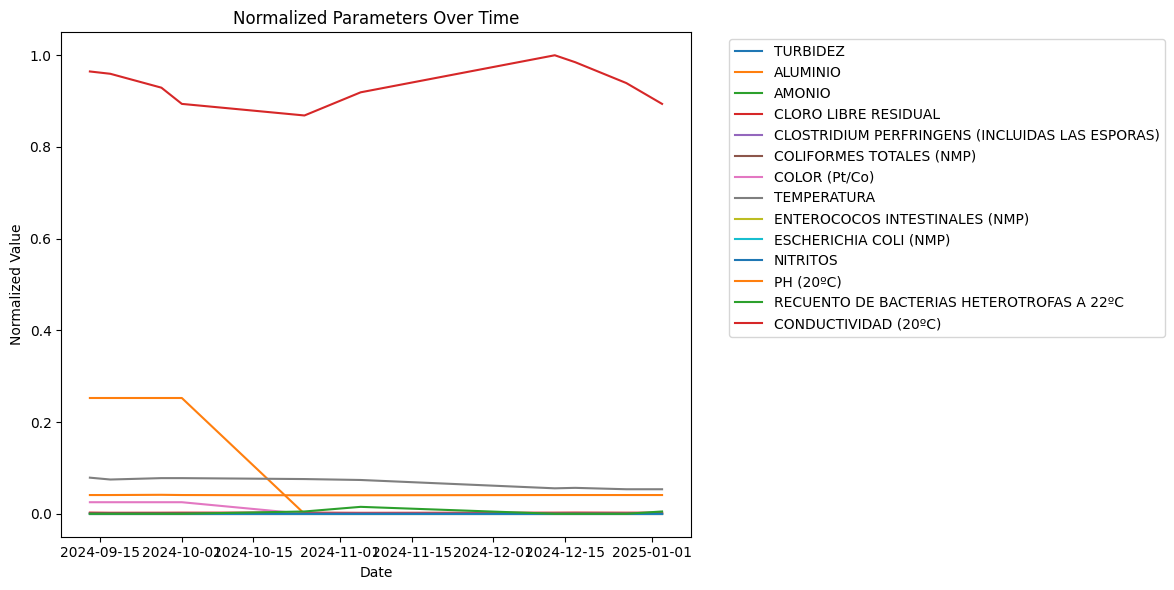

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Normalize the 'value' column using Min-Max scaling
scaler = MinMaxScaler()
df['normalized_value'] = scaler.fit_transform(df[['value']])

# Plot all parameters in the same plot
plt.figure(figsize=(12, 6))
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    plt.plot(subset['date'], subset['normalized_value'], label=param)

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Parameters Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pip 